In [3]:
import pandas as pd
import ast
from datasets  import load_dataset
import  matplotlib.pyplot   as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Only get Data Anayst jobs in the US
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country'] == 'United States')].copy()


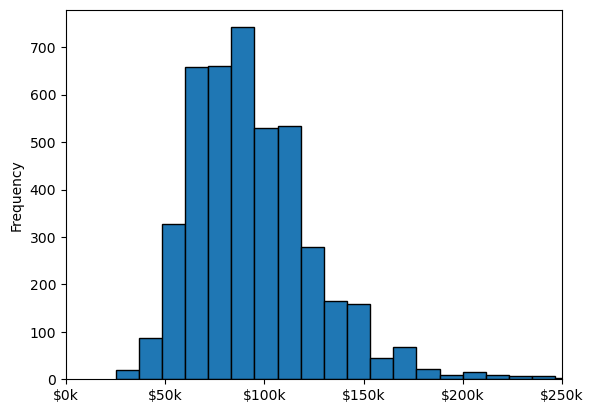

In [4]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30,edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))